In [4]:
conda install lightgbm

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.1.1             |   py38h23ab428_0         867 KB
    ------------------------------------------------------------
                                           Total:         867 KB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/osx-64::lightgbm-3.1.1-py38h23ab428_0



lightgbm-3.1.1       | 867 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [19]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install catboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catboost-0.25.1            |   py38h50d1736_0        10.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.0 MB

The following NEW packages will be INSTALLED:

  catboost           conda-forge/osx-64::catboost-0.25.1-py38h50d1736_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38hecd8cb5_1 --> conda-forge::conda-4.10.1-py38h50d1736_0



catboost-0.25.1      | 10.0 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use upd

In [212]:
conda install geopy

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0



geopy-2.1.0          | 64 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may n

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix

## Model

In [3]:
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cab

## Input data

In [355]:
train_df =  pd.read_csv('train.csv', sep=',', engine='python')
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))

#### Merge

### Drop some and merge

In [327]:
train_df_drop_some=train_df[~((train_df.isnull().sum(axis=1)>=10) & (train_df['Weather']==0))]

In [351]:
train_df[((train_df.isnull().sum(axis=1)>=10) & (train_df['Weather']==0))]

,Date,Loc,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,...,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM
503,2013/4/3,NaN,NaN,NaN,NaN,NaN,NNW,NaN,ESE,NaN,...,13.859574,46.383042,NaN,1001.6,6.000000,NaN,31.5,NaN,0,0.0
601,2016/4/20,NaN,NaN,24.7,NaN,7.993227,SE,31.00000,NaN,NaN,...,47.028172,71.319999,NaN,NaN,NaN,NaN,13.6,23.3,0,0.0
1068,2010/7/16,Tuggeranong,-3.4,NaN,NaN,NaN,WNW,17.00000,NaN,NaN,...,NaN,77.124337,NaN,1026.4,NaN,4.27812,2.5,NaN,0,NaN
1384,NaN,Albury,1.5,NaN,5.69496,NaN,NNE,NaN,NaN,NaN,...,65.505356,78.846179,NaN,1025.1,7.000000,NaN,NaN,12.6,0,NaN
2529,NaN,NaN,19.2,NaN,NaN,NaN,N,17.00000,N,NaN,...,NaN,61.525581,1020.7,1018.2,4.167266,NaN,NaN,25.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34642,2014/1/26,Mildura,NaN,NaN,NaN,9.100000,N,NaN,NE,NW,...,44.511107,NaN,1029.7,NaN,0.000000,1.00000,NaN,NaN,0,NaN
34686,NaN,NaN,NaN,20.5,5.40000,3.300000,NaN,NaN,NNW,NaN,...,51.933131,60.315157,1012.8,1011.7,NaN,NaN,15.7,NaN,0,NaN
34696,NaN,Albany,NaN,30.6,NaN,NaN,NaN,39.38315,NE,SW,...,NaN,50.929527,NaN,NaN,6.000000,5.00000,23.4,NaN,0,2.0
34792,2013/12/6,NaN,9.4,NaN,1.80000,10.400000,NaN,NaN,NE,SW,...,NaN,NaN,NaN,NaN,1.000000,NaN,14.1,20.5,0,0.0


In [328]:
train_end_id = len(train_df_drop_some)
df = pd.concat([train_df_drop_some, df_test ], sort=False, ignore_index=True)

### Dir Maerge

In [359]:
train_end_id = len(train_df)
df = pd.concat([train_df, df_test ], sort=False, ignore_index=True)

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
loc = geolocator.geocode("Albany",country_codes='au')
print("latitude is :" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)

latitude is : -35.0247822 
longtitude is: 117.883608


In [287]:
list_lat={}
list_long={}

In [288]:
geolocator = Nominatim(user_agent="my_user_agent")

In [289]:
loc_ar=df['Loc'].astype("category").cat.categories

In [293]:
count=0
for loc in loc_ar:
    #print(loc)
    loc_tmp = geolocator.geocode(loc,country_codes='au')
    if(loc_tmp is None):
        #print(loc," is a special case")
        count=count+1
    else:
        #print(loc," : ","latitude is :" ,loc_tmp.latitude," | longtitude is:" ,loc_tmp.longitude)
        list_lat[loc]=loc_tmp.latitude
        list_long[loc]=loc_tmp.longitude

###### Other special cases

In [16]:
#AliceSprings
#-23.69476765166359, 133.88013476606403

list_lat['AliceSprings']=-23.69476765166359
list_long['AliceSprings']=133.88013476606403

#BadgerysCreek
#-33.88144769375396, 150.74157022910964
#-33.869832171766625, 150.70766710949107
#-33.89420156821954, 150.78457140108156

list_lat['BadgerysCreek']=-33.88144769375396
list_long['BadgerysCreek']=150.74157022910964

#CoffsHarbour
#-30.29354061803095, 153.1106557701742
#-30.301026631528106, 153.1086029124331

list_lat['CoffsHarbour']=-30.2935406180309
list_long['CoffsHarbour']=153.1106557701742

#GoldCoast
#-28.00448090555341, 153.40094017442507

list_lat['GoldCoast']=-28.00448090555341
list_long['GoldCoast']=153.40094017442507

#MelbourneAirport
#-37.66913966648534, 144.84103802722368

list_lat['MelbourneAirport']=-37.66913966648534
list_long['MelbourneAirport']=144.84103802722368

#MountGambier
#-37.830252930715886, 140.78030083281405

list_lat['MountGambier']=-37.83025293071588
list_long['MountGambier']=140.78030083281405

#MountGinini
#-35.528580398584126, 148.77210691383866

list_lat['MountGinini']=-35.528580398584126
list_long['MountGinini']=148.77210691383866

#NorahHead
#-33.28303332733658, 151.56692459655088

list_lat['NorahHead']=-33.28303332733658
list_long['NorahHead']=151.56692459655088

#NorfolkIsland
#-29.036987095556874, 167.9544349216241

list_lat['NorfolkIsland']=-29.036987095556874
list_long['NorfolkIsland']=167.9544349216241

#PearceRAAF
#-31.66006327584827, 116.01528573154377

list_lat['PearceRAAF']=-31.66006327584827
list_long['PearceRAAF']=116.01528573154377

#PerthAirport
#-31.938538476567896, 115.96728138476293

list_lat['PerthAirport']=-31.938538476567896
list_long['PerthAirport']=115.96728138476293

#SalmonGums
#-32.952071797927424, 121.63797105529618

list_lat['SalmonGums']=-32.952071797927424
list_long['SalmonGums']=121.63797105529618

#SydneyAirport
#-33.93961124877781, 151.17491161789997

list_lat['SydneyAirport']=-33.93961124877781
list_long['SydneyAirport']=151.17491161789997

#WaggaWagga
#-35.105081396170945, 147.36008824673422

list_lat['WaggaWagga']=-35.105081396170945
list_long['WaggaWagga']=147.36008824673422

In [383]:
list_lat

{'Adelaide': -34.9281805,
 'Albany': -35.0247822,
 'Albury': -36.0804766,
 'Ballarat': -37.5622632,
 'Bendigo': -36.7588767,
 'Brisbane': -27.4689682,
 'Cairns': -16.9206657,
 'Canberra': -35.2975906,
 'Cobar': -31.4983333,
 'Dartmoor': -37.9225444,
 'Darwin': -12.46044,
 'Hobart': -42.8825088,
 'Katherine': -14.4642313,
 'Launceston': -41.4340813,
 'Melbourne': -37.8142176,
 'Mildura': -34.1847265,
 'Moree': -29.4617202,
 'Newcastle': -32.9192953,
 'Nhil': -35.4325283,
 'Nuriootpa': -34.4693354,
 'Penrith': -33.7510792,
 'Perth': -31.9527121,
 'Portland': -38.3456231,
 'Richmond': -20.569655,
 'Sale': -38.1050358,
 'Sydney': -33.8548157,
 'Townsville': -19.2569391,
 'Tuggeranong': -35.4209771,
 'Uluru': -25.3455545,
 'Walpole': -34.9776796,
 'Watsonia': -37.7110022,
 'Williamtown': -32.815,
 'Witchcliffe': -34.0263348,
 'Wollongong': -34.4243941,
 'Woomera': -31.1999142}

In [385]:
list_long

{'Adelaide': 138.5999312,
 'Albany': 117.883608,
 'Albury': 146.9162795,
 'Ballarat': 143.8607215,
 'Bendigo': 144.2825931,
 'Brisbane': 153.0234991,
 'Cairns': 145.7721854,
 'Canberra': 149.1012676,
 'Cobar': 145.8344444,
 'Dartmoor': 141.2766551,
 'Darwin': 130.8410469,
 'Hobart': 147.3281233,
 'Katherine': 132.2638568,
 'Launceston': 147.1373496,
 'Melbourne': 144.9631608,
 'Mildura': 142.1624972,
 'Moree': 149.8407153,
 'Newcastle': 151.7795348,
 'Nhil': 141.2833187,
 'Nuriootpa': 138.9939006,
 'Penrith': 150.6941684,
 'Perth': 115.8604796,
 'Portland': 141.6042304,
 'Richmond': 142.9283602143393,
 'Sale': 147.0647902,
 'Sydney': 151.2164539,
 'Townsville': 146.8239537,
 'Tuggeranong': 149.0921341,
 'Uluru': 131.03696147470208,
 'Walpole': 116.7310063,
 'Watsonia': 145.083635,
 'Williamtown': 151.8427778,
 'Witchcliffe': 115.1004768,
 'Wollongong': 150.89385,
 'Woomera': 136.8253532}

In [381]:
np.save('list_lat.npy', list_lat) 
np.save('list_long.npy', list_long) 

In [382]:
list_lat = np.load('list_lat.npy',allow_pickle='TRUE').item()

In [384]:
list_long = np.load('list_long.npy',allow_pickle='TRUE').item()

In [361]:
df['loc_lat']=df['Loc'].map(list_lat)
df['loc_long']=df['Loc'].map(list_long)

In [360]:
df

,Date,Loc,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,...,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM
0,2016/7/19,NaN,19.5,NaN,5.69496,0.500000,ENE,61.0,ENE,ENE,...,86.641375,41.810006,1020.4,1021.9,NaN,7.00000,NaN,19.6,0.0,NaN
1,2010/7/26,Canberra,2.1,15.7,NaN,5.700000,E,26.0,NaN,SE,...,53.275715,76.598048,1023.7,1020.8,4.000000,1.00000,9.0,14.1,0.0,0.0
2,2014/4/2,Woomera,20.9,36.1,5.69496,NaN,S,39.0,S,SW,...,15.471574,52.163254,1017.1,1014.9,4.167266,4.27812,24.2,33.9,0.0,0.0
3,2014/11/19,Tuggeranong,11.5,23.9,5.69496,7.993227,NNE,35.0,W,NaN,...,46.442398,67.664733,1010.2,NaN,4.167266,4.27812,13.8,21.8,1.0,0.2
4,NaN,Hobart,8.2,20.5,3.20000,NaN,N,69.0,N,WNW,...,51.830889,51.770240,NaN,1001.2,7.000000,7.00000,NaN,17.6,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2011/12/27,NaN,9.6,21.5,8.00000,12.000000,SSW,31.0,ESE,SE,...,39.878487,57.490952,1024.5,1022.8,0.000000,6.00000,14.3,19.0,0.0,0.0
69996,NaN,Canberra,11.6,31.4,5.69496,7.993227,NNE,39.0,NaN,SE,...,NaN,70.743790,1019.1,1016.3,4.167266,4.27812,19.3,NaN,0.0,0.0
69997,2011/1/22,Moree,22.2,34.5,NaN,7.600000,NNE,39.0,NNE,N,...,30.743840,64.412890,NaN,1008.5,7.000000,7.00000,25.2,NaN,0.0,0.0
69998,2010/10/2,Mildura,16.4,43.5,7.00000,12.700000,ENE,43.0,NaN,NaN,...,28.084916,63.565166,1014.2,1010.5,0.000000,4.27812,28.9,NaN,0.0,NaN


In [362]:
df_loc=df.copy()

In [363]:
df_loc['Date']=df_loc['Date'].fillna("0")

In [364]:
def replace_string(x):
    if(x!="0"):
        tmp=x.split("/")
        #print(tmp)
        rx=int(tmp[0])*10000+int(tmp[1])*100+int(tmp[2])
        return rx
    else:
        return int(x)

In [365]:
df_loc['Date']=df_loc['Date'].apply(lambda x: replace_string(x))

In [366]:
df_loc['Date']=df_loc['Date'].replace(0,np.nan)

In [354]:
df_loc.loc[[503],:]

,Date,Loc,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,...,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM,loc_lat,loc_long
503,20111112.0,AliceSprings,NaN,32.2,10.2,NaN,NaN,46.0,ENE,N,...,1016.7,1011.5,1.0,NaN,26.2,NaN,0.0,0.0,NaN,NaN


##### Test

In [28]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#Date_li=np.zeros(len(df))

#df['Date']=df['Date'].apply(lambda x: float(x.replace("/","")))

#df = df.drop(columns = ['Loc','DayWindDir','NightWindDir'])
#df = df.drop(columns = ['Loc'])
#df['Loc'] = df['Loc'].astype(str)
#df['WindDir']= df['WindDir'].astype(str)
#df['DayWindDir'] = df['DayWindDir'].astype(str)
#df['NightWindDir'] = df['NightWindDir'].astype(str)

#df['Loc'] = labelencoder.fit_transform(df['Loc'])
#df['WindDir'] = labelencoder.fit_transform(df['WindDir'])
#df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir'])
#df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir'])

In [302]:
df_loc.dtypes

Date              float64
Loc                object
TempLow           float64
TempHigh          float64
Steaming          float64
Sun               float64
WindDir            object
WindSpeed         float64
DayWindDir         object
NightWindDir       object
DayWindSpeed      float64
NightWindSpeed    float64
DayHumidity       float64
NightHumidity     float64
DayPressure       float64
NightPressure     float64
DayCloud          float64
NightCloud        float64
DayTemp           float64
NightTemp         float64
Weather           float64
RISK_MM           float64
loc_lat           float64
loc_long          float64
dtype: object

#### Drop directions

In [367]:
df_preprocessed=df_loc.copy()

In [368]:
cols = ["WindDir","DayWindDir","NightWindDir"]
for item in cols:
    df_preprocessed[item] = df_loc[item].astype("category").cat.codes +1

In [369]:
df_preprocessed=df_preprocessed.drop(columns = ['Loc'])

### Missing

In [370]:
df_preprocessed = df_preprocessed.fillna(df_preprocessed.mean())

In [167]:
df_preprocessed.dtypes

Date              float64
TempLow           float64
TempHigh          float64
Steaming          float64
Sun               float64
WindDir              int8
WindSpeed         float64
DayWindSpeed      float64
NightWindSpeed    float64
DayHumidity       float64
NightHumidity     float64
DayPressure       float64
NightPressure     float64
DayCloud          float64
NightCloud        float64
DayTemp           float64
NightTemp         float64
Weather           float64
RISK_MM           float64
loc_lat           float64
loc_long          float64
dtype: object

### SplittingSHIT

In [315]:
#df_preprocessed.loc[range(train_end_id), :]

In [316]:
#df_preprocessed.iloc[:train_end_id, :]

In [371]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_preprocessed.drop(columns = ['Weather']).iloc[:train_end_id, :],df_preprocessed['Weather'].iloc[:train_end_id], test_size=0.25)

In [372]:
x_test = df_preprocessed.drop(columns = ['Weather']).iloc[train_end_id:, :]

In [319]:
#df_preprocessed.dtypes.tolist()

#### Standariz3

In [170]:
num_cols = x_train.columns[x_train.dtypes.apply(lambda c: np.issubdtype(c, np.float64))]

In [171]:
num_cols

Index(['Date', 'TempLow', 'TempHigh', 'Steaming', 'Sun', 'WindSpeed',
       'DayWindSpeed', 'NightWindSpeed', 'DayHumidity', 'NightHumidity',
       'DayPressure', 'NightPressure', 'DayCloud', 'NightCloud', 'DayTemp',
       'NightTemp', 'RISK_MM', 'loc_lat', 'loc_long'],
      dtype='object')

In [373]:
#x_train

##### Original

In [374]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [375]:
x_val_std = sc.transform(x_val)

##### not standarizing cat

In [193]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train[num_cols])

x_train_std=x_train.copy()
x_test_std=x_test.copy()

x_train_std[num_cols]: pd.DataFrame=sc.transform(x_train[num_cols])
x_test_std[num_cols]: pd.DataFrame=sc.transform(x_test[num_cols])

X_train=x_train.copy()
X_train[num_cols]: pd.DataFrame=sc.transform(x_train[num_cols])

X_train

In [195]:
x_train_std

,Date,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,RISK_MM,loc_lat,loc_long
30821,0.001420,0.003901,1.010598,0.002532,0.003874,7,-0.005437,-1.754580,-1.224665,-2.187448,-1.020185,0.095514,0.001572,0.004963,-0.012760,0.074609,0.004276,-0.275376,0.001810,-0.006780
14577,0.537705,-1.910173,-0.822977,0.004889,0.964925,3,0.912063,-0.104121,0.718480,-0.002309,0.765072,0.001242,1.467002,-1.544103,-1.214445,-1.299693,0.004276,-0.275376,1.562940,-0.751074
15741,1.457587,0.003901,-0.981044,0.002532,0.008050,2,-0.005437,-0.010287,-1.224665,2.851527,-0.003088,-0.870929,0.001572,-0.001192,1.950495,0.004179,-1.480909,2.466862,2.122319,0.098839
24595,-0.328323,-1.301709,0.899951,0.002532,0.003874,7,-0.382207,-0.358038,-0.188321,-1.659894,-0.003088,-0.000406,0.001572,0.004963,-0.012710,0.004179,1.106448,-0.002362,-0.094071,-1.900999
11586,1.421994,0.819223,0.726078,0.461109,1.131573,2,0.394355,-0.104121,1.495739,-0.002309,-1.190263,0.061604,0.001572,-1.544103,-1.741935,1.242765,0.533299,-0.275376,2.357289,0.464758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,0.001420,-0.050012,0.109617,0.002532,0.003874,4,-0.005437,-0.865871,-0.188321,-0.002309,1.276225,0.001242,-0.605270,1.390414,-0.012760,-0.492291,0.189410,-0.275376,-0.513907,0.678670
24114,0.130269,1.688457,0.789304,-0.241669,-3.242949,2,-0.005437,-0.992830,-2.131466,0.708630,0.026145,-0.514871,-0.724171,1.390414,1.423005,1.242765,0.942691,-0.002362,0.001810,-0.006780
287,0.130800,-0.745399,-1.139111,-1.717504,-2.826328,1,-0.986199,-0.010287,-0.188321,0.820629,0.079596,0.332887,0.328951,1.390414,-0.012710,-0.767151,-0.973263,-0.275376,0.087347,-2.433655
20884,1.408597,1.949227,1.468991,1.374720,1.006587,0,-0.005437,-0.611955,0.070765,0.078839,-0.003088,-0.921795,-1.131831,-0.076845,-1.741935,1.775307,1.597718,-0.275376,3.573828,-1.036540


In [196]:
x_val_std=x_val.copy()
x_val_std[num_cols]: pd.DataFrame=sc.transform(x_val[num_cols])

##### Oversampleing

In [376]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
x_train_std, y_train = sampler.fit_resample(x_train_std, y_train)

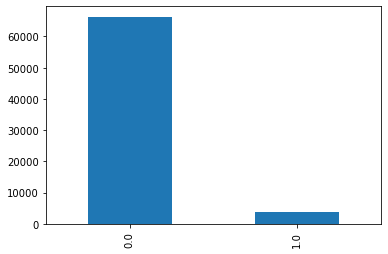

In [187]:
ax = df['Weather'].value_counts().plot(kind='bar')

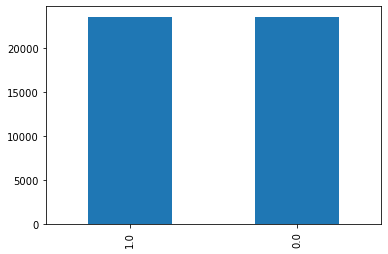

In [192]:
plot_y = pd.DataFrame(y_train, columns = ['Weather'])
after_processed = plot_y['Weather'].value_counts().plot(kind='bar')

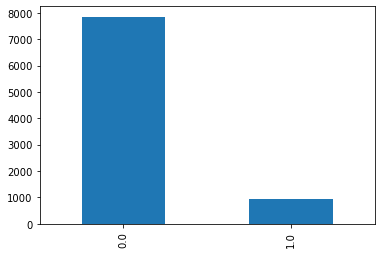

In [193]:
plot_y_val = pd.DataFrame(y_val, columns = ['Weather'])
plot_y_val_plot = plot_y_val['Weather'].value_counts().plot(kind='bar')

## XGB

In [272]:
xgb = XGBClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(xgb, param_grid=param_dist, cv = 3, verbose=10, n_jobs=8, scoring='f1')

In [56]:
grid_search.fit(x_train_std, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:51:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [57]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [273]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,use_label_encoder=False)

In [274]:
xgb_model.fit(x_train_std,y_train)

[09:45:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [97]:
y_pred_xgb = xgb_model.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_xgb))
print('f1-score: %f' % f1_score(y_val, y_pred_xgb))

Accuracy: 0.858118
f1-score: 0.432924


#### Drop cat

In [220]:
y_pred_xgb = xgb_model.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_xgb))
print('f1-score: %f' % f1_score(y_val, y_pred_xgb))

Accuracy: 0.862897
f1-score: 0.448513


##### Drop NA>9 std cat

In [275]:
y_pred_xgb = xgb_model.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_xgb))
print('f1-score: %f' % f1_score(y_val, y_pred_xgb))

Accuracy: 0.872682
f1-score: 0.451739


In [202]:
import seaborn as sns

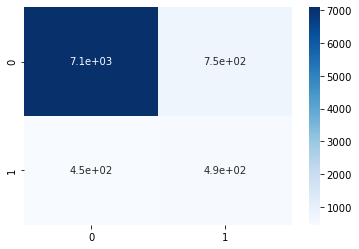

In [221]:
cm=confusion_matrix(y_val,y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues')

## Craete Ans 

In [101]:
ans_pred = xgb_model.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('xgboost_spw_6.csv',  index_label = 'Id')

## Catboost

In [1]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [200]}
cb = cab.CatBoostClassifier(silent=True)
cb_model = GridSearchCV(cb, params, scoring="f1", cv = 10)
cb_model.fit(x_train_std, y_train)

NameError: name 'cab' is not defined

## Light BGM

In [103]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [3,4,5,6,7,8,9,10],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=8, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)

In [104]:
grid_search.fit(x_train_std,y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Info] Number of positive: 23622, number of negative: 23622
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5093
[LightGBM] [Info] Number of data points in the train set: 47244, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

LGBMClassifier(max_depth=10, n_estimators=200, num_leaves=900, silent=False)

In [346]:
lbgm=lgb.LGBMClassifier(max_depth=10, n_estimators=200, scale_pos_weight=4, num_leaves=20)

In [379]:
lbgm.fit(x_train_std,y_train)

LGBMClassifier(max_depth=10, n_estimators=200, num_leaves=20,
               scale_pos_weight=4)

In [223]:
y_pred_lbgm = lbgm.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_lbgm))
print('f1-score: %f' % f1_score(y_val, y_pred_lbgm))

Accuracy: 0.840938
f1-score: 0.453906


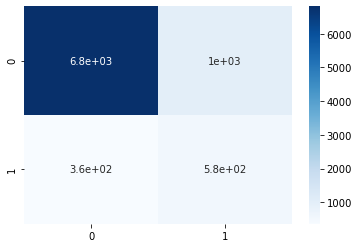

In [224]:
cm=confusion_matrix(y_val,y_pred_lbgm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues')

##### Drop NA>9 std cat

In [380]:
y_pred_lbgm = lbgm.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_lbgm))
print('f1-score: %f' % f1_score(y_val, y_pred_lbgm))

Accuracy: 0.841962
f1-score: 0.453365


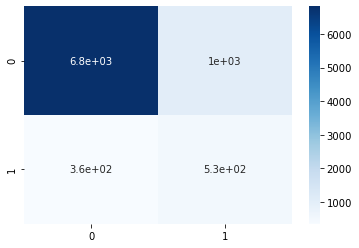

In [349]:
cm=confusion_matrix(y_val,y_pred_lbgm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues')

## Craete Ans 

In [282]:
ans_pred = lbgm.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('lbgm_drop_na.csv',  index_label = 'Id')